#  LU3MA201 : Projet / Travail d’étude et de recherche

<!-- dom:AUTHOR: Aya Bouzidi at [Sorbonne Université](http://www.sorbonne-universite.fr/), -->
<!-- Author: -->  
**Aya Bouzidi**, **Amaia Cardiel**, **Camille Grimal**, **Elysé Miadantsoa Rasoloarivony** ( Etudiants en L3 de Mathématiques à [Sorbonne Université](http://www.sorbonne-universite.fr/) ).

Sous la direction de : **Fréderic Nataf** ( Directeur de recherche au [Laboratoire J.L. Lions](https://www.ljll.math.upmc.fr/), [Sorbonne Université](http://www.sorbonne-universite.fr/) )

Licence <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND</a>

# 1 Algorithme simple de reconnaissance de chiﬀres manuscrits

<div id="ch:method_1"></div>

Ce travail est une introduction à l'apprentissage automatique, il s'agit d'écrire un programme simple de reconnaissance de chiffres manuscrits. Pour cela, on utilise la base de données **MNIST** très utilisée en machine learning. Cette base est constituée de **70 000** images de chiffres écrits à la main, chaque image est constituée de **28x28** pixels. Voici un exemple de chiffres de la base MNIST ([source](https://fr.wikipedia.org/wiki/Base_de_donn%C3%A9es_MNIST#/media/Fichier:MnistExamples.png)).



Les instructions suivantes permettent de charger les données de chiffres manuscrits disponibles dans le package mnist-original.mat :


In [1]:
import scipy.io as spi
import numpy as np
import matplotlib.pyplot as plt

mat=spi.loadmat("base_apprentissage.mat")
data_app=np.transpose(mat['data'])
label_app=np.array(mat['label'])[0] #label: chiffre numérisé
label_app=label_app.astype(int) #Les labels sont stockés en flottants, on les convertit en entiers

mat2 = spi.loadmat("base_test.mat")
data_test = np.transpose(mat2['data'])
label_test = np.array(mat2['label'])[0]
label_test =label_test.astype(int)

# 1.1 Distance euclidienne

<div id="method_1"></div>
Dans la base d'apprentissage, on calcule la valeur moyenne des classes de 0 à 9 et on affiche l'image moyenne associée à chaque chiffre.


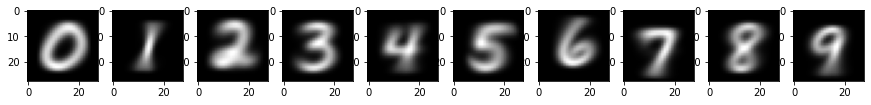

In [2]:
X,x=data_app,label_app
moy_chiff=[]
plt.figure(figsize=(15,2))
for i in range(10):
    moy=np.mean(X[x==i],axis=0)
    moy_chiff+=[moy]
    plt.subplot(1,10,i+1)
    plt.imshow(moy.reshape(28,28),cmap='gray')

<div id="method_1"></div>

Pour chaque vecteur de la base de tests, on lui attribue le chiffre dont le centroïde est le plus proche par rapport à la distance euclidienne.

In [3]:
#Définition de la fonction qui estime le chiffre d'un vecteur de la base de tests:
def estim_chiffre_1(v):
    distances=np.array([np.linalg.norm(v-u) for u in moy_chiff]) #distances entre v et les "chiffres moyens"
    return np.argmin(distances)

In [4]:
#Labels estimés pour les vecteurs de la base de tests:
k=len(data_test)
label_estim_1=np.zeros(k)
for i in range(k):
    label_estim_1[i]=estim_chiffre_1(data_test[i])

<div id="method_1"></div>

On déduit une estimation du pourcentage de prédictions correctes sur la base de tests.

In [5]:
np.mean(label_estim_1==label_test)

0.8159285714285714

<div id="method_1"></div>
Pour chaque chiffre, on déduit une estimation du pourcentage de prédictions correctes.

In [6]:
#On définit la fonction qui donne la liste des chiffres i dans la base de tests: 
long=len(label_test)
def estim_1(i):
    lae=[] #list des labels estimés pour les chiffres i
    for j in range(long):
        if label_test[j]==i:
            lae+=[estim_chiffre_1(data_test[j])]
    long1=len(lae)
    laee=np.array(lae)
    la=np.array([i for j in range(long1)]) 
    return np.mean(la==laee)
#Estimation du pourcentage de prédictions correctes pour chaque chiffre: 
#for i in range(10):
    #print("précision pour le chiffre", i ,"est de" , estim_1(i))

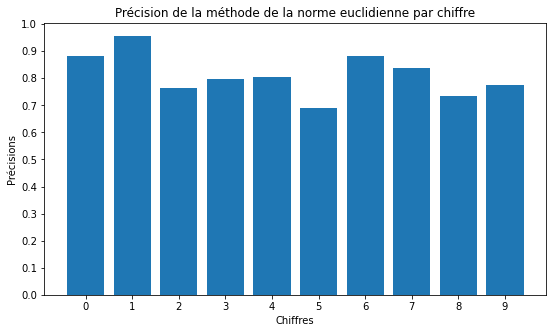

In [15]:
plt.figure(figsize=(9,5))
plt.title('Précision de la méthode de la norme euclidienne par chiffre')
plt.xlabel(r'Chiffres')
plt.ylabel(r'Précisions')
x=[i for i in range(10)]
y=[estim_1(i) for i in range(10)]
plt.bar(x, y)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#plt.legend()
#plt.savefig("test.png", dpi=100) # exporte la figure en PNG
plt.show()

<div id="method_1"></div>

**Remarque**: Le chiffre 1 a la plus grande précision, le chiffre 5 a la plus petite précision.

In [10]:
print([estim_1(i) for i in range(10)])

[0.8671988388969522, 0.9687108886107635, 0.7467153284671533, 0.7728268809349891, 0.8052136133236785, 0.6462848297213623, 0.8588498879761016, 0.8472775564409031, 0.7440860215053764, 0.7682215743440233]


# 1.2 Distance de Minkowski: p-distance (généralisation)

<div id="method_1"></div>

Pour chaque vecteur de la base de tests, on lui attribue le chiffre dont le centroïde est le plus proche par rapport à la distance p.

In [18]:
#Définition de la fonction qui estime le chiffre d'un vecteur de la base de tests en p-distance:
def estim_chiffre(v,p):
    distances=np.array([np.linalg.norm(v-u,p) for u in moy_chiff]) #distances entre v et les "chiffres moyens"
    return np.argmin(distances)

<div id="method_1"></div>
On déduit une estimation du pourcentage de prédictions correctes sur la base de tests pour chaque p-distance.

In [19]:
#Labels estimés pour les vecteurs de la base de tests:
k=len(data_test)
for p in range(3,11):
    label_estim=np.zeros(k)
    for i in range(k):
        label_estim[i]=estim_chiffre(data_test[i],p)
    print("précision pour la distance", p ,"est de" ,np.mean(label_estim==label_test))

précision pour la distance 3 est de 0.8250714285714286
précision pour la distance 4 est de 0.8174285714285714
précision pour la distance 5 est de 0.8033571428571429
précision pour la distance 6 est de 0.7943571428571429
précision pour la distance 7 est de 0.7848571428571428
précision pour la distance 8 est de 0.7779285714285714
précision pour la distance 9 est de 0.7712142857142857
précision pour la distance 10 est de 0.7649285714285714


<div id="method_1"></div>
Pour chaque chiffre et chaque p-distance, on déduit une estimation du pourcentage de prédictions correctes.

In [39]:
#On définit la fonction qui donne la liste des chiffres i dans la base de tests: 
long=len(label_test)
def estim(i,p):
    lae=[] #list des labels estimés pour les chiffres i
    for j in range(long):
        if label_test[j]==i:
            lae+=[estim_chiffre(data_test[j],p)]
    long1=len(lae)
    laee=np.array(lae)
    la=np.array([i for j in range(long1)]) 
    return np.mean(la==laee)
#Estimation du pourcentage de prédictions correctes pour chaque chiffre et chaque distance: 
for p in range(3,11):
    for i in range(10):
        print("précision pour le chiffre", i ,"pour la distance", p, "est de" , estim(i,p)) 
    print("")

précision pour le chiffre 0 pour la distance 3 est de 0.9047619047619048
précision pour le chiffre 1 pour la distance 3 est de 0.8750792644261256
précision pour le chiffre 2 pour la distance 3 est de 0.8332155477031802
précision pour le chiffre 3 pour la distance 3 est de 0.7851123595505618
précision pour le chiffre 4 pour la distance 3 est de 0.7960088691796009
précision pour le chiffre 5 pour la distance 3 est de 0.7788617886178861
précision pour le chiffre 6 pour la distance 3 est de 0.8890479599141017
précision pour le chiffre 7 pour la distance 3 est de 0.7983924983255191
précision pour le chiffre 8 pour la distance 3 est de 0.8040238450074516
précision pour le chiffre 9 pour la distance 3 est de 0.7770655270655271

précision pour le chiffre 0 pour la distance 4 est de 0.9230769230769231
précision pour le chiffre 1 pour la distance 4 est de 0.7920101458465441
précision pour le chiffre 2 pour la distance 4 est de 0.872791519434629
précision pour le chiffre 3 pour la distance 4 est 

In [40]:
Y=[[0],[0],[0]]
for p in range(3,11):
    Y.append([estim(i,p) for i in range(10)])

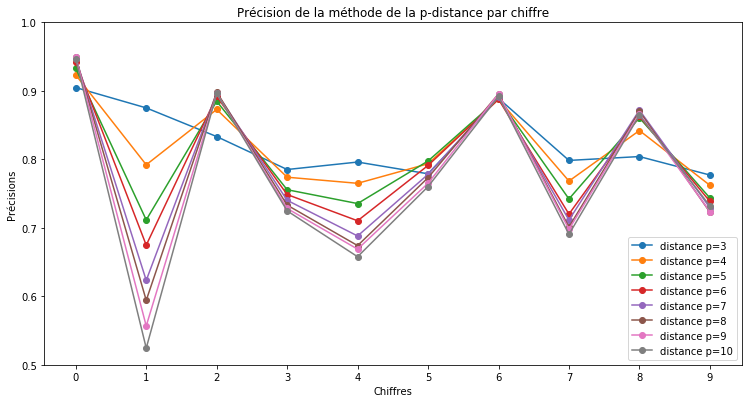

In [66]:
plt.figure(figsize=(12.5,6.3))
plt.title('Précision de la méthode de la p-distance par chiffre')
x=[i for i in range(10)]
for p in range(3,11):
    plt.plot(x, Y[p], marker='o', label=(r"distance p={}".format(p)))
plt.xlabel(r'Chiffres')
plt.ylabel(r'Précisions')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0])
plt.legend()
plt.show()

<div id="method_1"></div>

**Remarque**: Pour toutes ces distances, le chiffre 0 a la plus grande précision. On remarque que plus on augmente p, plus les précisions de 1, 4 et 7 diminuent. Les autres précisions sont presque constantes. 

# 1.3 Similarité cosinus

In [41]:
#On définit la fonction cosine: 
def cosine(u,v):
    return np.inner(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

<div id="method_1"></div>
Pour chaque vecteur de la base de tests, on lui attribue le chiffre dont le centroïde est le plus proche par rapport à la distance cosine.

In [42]:
#Définition de la fonction qui estime le chiffre d'un vecteur de la base de tests:
def estim_chiffre_2(v):
    distances=np.array([cosine(u,v) for u in moy_chiff]) #distances cosine entre v et les "chiffres moyens"
    return np.argmax(distances) #On prend le max car plus l'angle est petit, plus le cos est grand

In [43]:
#Labels estimés pour les vecteurs de la base de tests:
k=len(data_test)
label_estim_2=np.zeros(k)
for i in range(k):
    label_estim_2[i]=estim_chiffre_2(data_test[i])

In [23]:
np.mean(label_estim_2==label_test)

0.8216428571428571

<div id="method_1"></div>

Pour chaque chiffre, on déduit une estimation du pourcentage de prédictions correctes.

In [44]:
#On définit la fonction qui donne la liste des chiffres i dans la base de tests: 
long=len(label_test)
def estim_2(i):
    lae=[] #list des labels estimés pour les chiffres i
    for j in range(long):
        if label_test[j]==i:
            lae+=[estim_chiffre_2(data_test[j])]
    long1=len(lae)
    laee=np.array(lae)
    la=np.array([i for j in range(long1)]) 
    return np.mean(la==laee)
#Estimation du pourcentage de prédictions correctes pour chaque chiffre: 
#for i in range(10):
    #print("précision pour le chiffre", i ,"est de" , estim_2(i))

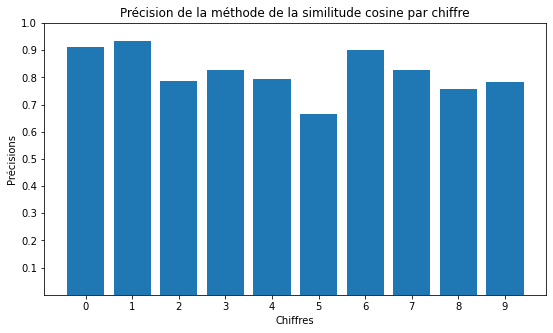

In [25]:
plt.figure(figsize=(9,5))
plt.title('Précision de la méthode de la similitude cosine par chiffre')
x=[i for i in range(10)]
y=[estim_2(i) for i in range(10)]
plt.bar(x, y)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlabel(r'Chiffres')
plt.ylabel(r'Précisions')
#plt.savefig("test.png", dpi=100) # exporte la figure en PNG
#plt.legend()
plt.show()

In [23]:
print([estim_2(i) for i in range(10)])

[0.8998548621190131, 0.9386733416770964, 0.7708029197080292, 0.8151935719503287, 0.7834902244750181, 0.6021671826625387, 0.8797610156833457, 0.8399734395750332, 0.7720430107526882, 0.7835276967930029]


# 1.4 Distance infinie

In [46]:
#Définition de la fonction qui estime le chiffre d'un vecteur de la base de tests:
def estim_chiffre_inf(v):
    distances=np.array([np.linalg.norm(v-u,np.inf) for u in moy_chiff]) #distances entre v et les "chiffres moyens"
    return np.argmin(distances)

In [47]:
#Labels estimés pour les vecteurs de la base de tests:
k=len(data_test)
label_estim_inf=np.zeros(k)
for i in range(k):
    label_estim_inf[i]=estim_chiffre_inf(data_test[i])

In [48]:
#On définit la fonction qui donne la liste des chiffres i dans la base de tests: 
long=len(label_test)
def estim_inf(i):
    lae=[] #list des labels estimés pour les chiffres i
    for j in range(long):
        if label_test[j]==i:
            lae+=[estim_chiffre_inf(data_test[j])]
    long1=len(lae)
    laee=np.array(lae)
    la=np.array([i for j in range(long1)]) 
    return np.mean(la==laee)
#Estimation du pourcentage de prédictions correctes pour chaque chiffre: 
#for i in range(10):
    #print("précision pour le chiffre", i ,"est de" , estim_inf(i))

In [87]:
np.mean(label_estim_inf==label_test)

0.6752857142857143

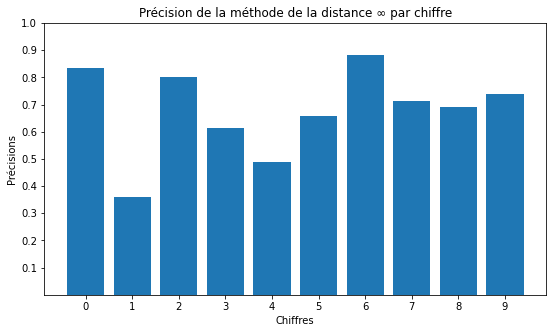

In [33]:
plt.figure(figsize=(9,5))
plt.title('Précision de la méthode de la distance \u221e par chiffre')
plt.xlabel(r'Chiffres')
plt.ylabel(r'Précisions')
x=[i for i in range(10)]
y=[estim_inf(i) for i in range(10)]
plt.bar(x, y)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

In [ ]:
#######################

In [49]:
y3=[estim(i,3) for i in range(10)]
y6=[estim(i,6) for i in range(10)]
y9=[estim(i,9) for i in range(10)]

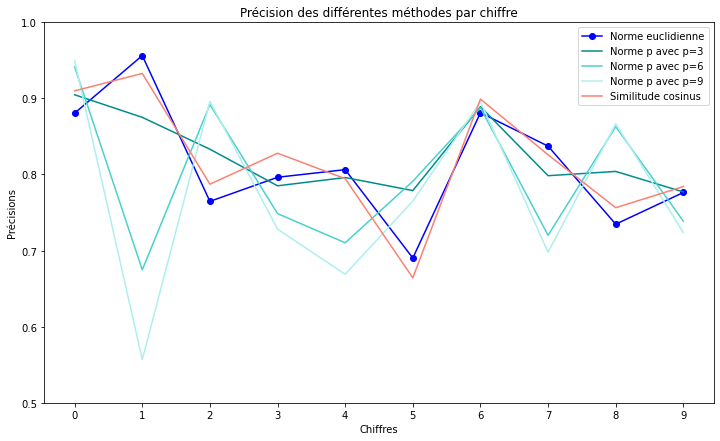

In [50]:
plt.figure(figsize=(12,7))
plt.title('Précision des différentes méthodes par chiffre')
x=[i for i in range(10)]
plt.plot(x, [estim_1(i) for i in range(10)], marker='o', label=(r"Norme euclidienne"),color="blue")
plt.plot(x, y3, label=(r"Norme p avec p=3"), color="darkcyan")
plt.plot(x, y6, label=(r"Norme p avec p=6"), color="mediumturquoise")
plt.plot(x, y9, label=(r"Norme p avec p=9"), color="paleturquoise")
plt.plot(x, [estim_2(i) for i in range(10)], label=(r"Similitude cosinus"),color="salmon")

plt.xlabel(r'Chiffres')
plt.ylabel(r'Précisions')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0])
plt.legend()
plt.show()

In [51]:
Y=[[0],[0],[0]]
for p in range(3,11):
    Y.append([estim(i,p) for i in range(10)]) 

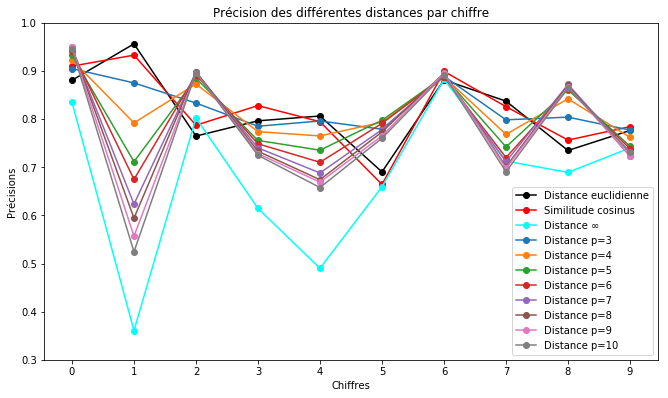

In [85]:
plt.figure(figsize=(11,6.2))
plt.title('Précision des différentes distances par chiffre')
x=[i for i in range(10)]
plt.plot(x, [estim_1(i) for i in range(10)], marker='o', label=(r"Distance euclidienne"),color="black")
plt.plot(x, [estim_2(i) for i in range(10)], marker='o', label=(r"Similitude cosinus"),color="red")
plt.plot(x, [estim_inf(i) for i in range(10)], marker='o', label=('Distance \u221e'),color="cyan")

for i in range(3,11):
    plt.plot(x, Y[i], marker='o', label=(r"Distance p={}".format(i)))

plt.xlabel(r'Chiffres')
plt.ylabel(r'Précisions')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.legend()
plt.show()

